### Ad Click Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset
df = pd.read_csv('Ad Click Data.csv', parse_dates = ['Timestamp'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 03:36:00,0


In [4]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,2016-04-22 02:07:00,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2016-02-01 17:24:00,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,2016-03-24 02:35:00,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0.0,Brazil,2016-06-03 21:43:00,1


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      999 non-null    object        
 6   Male                      997 non-null    float64       
 7   Country                   991 non-null    object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [8]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

##### Plotting missing values

<AxesSubplot:>

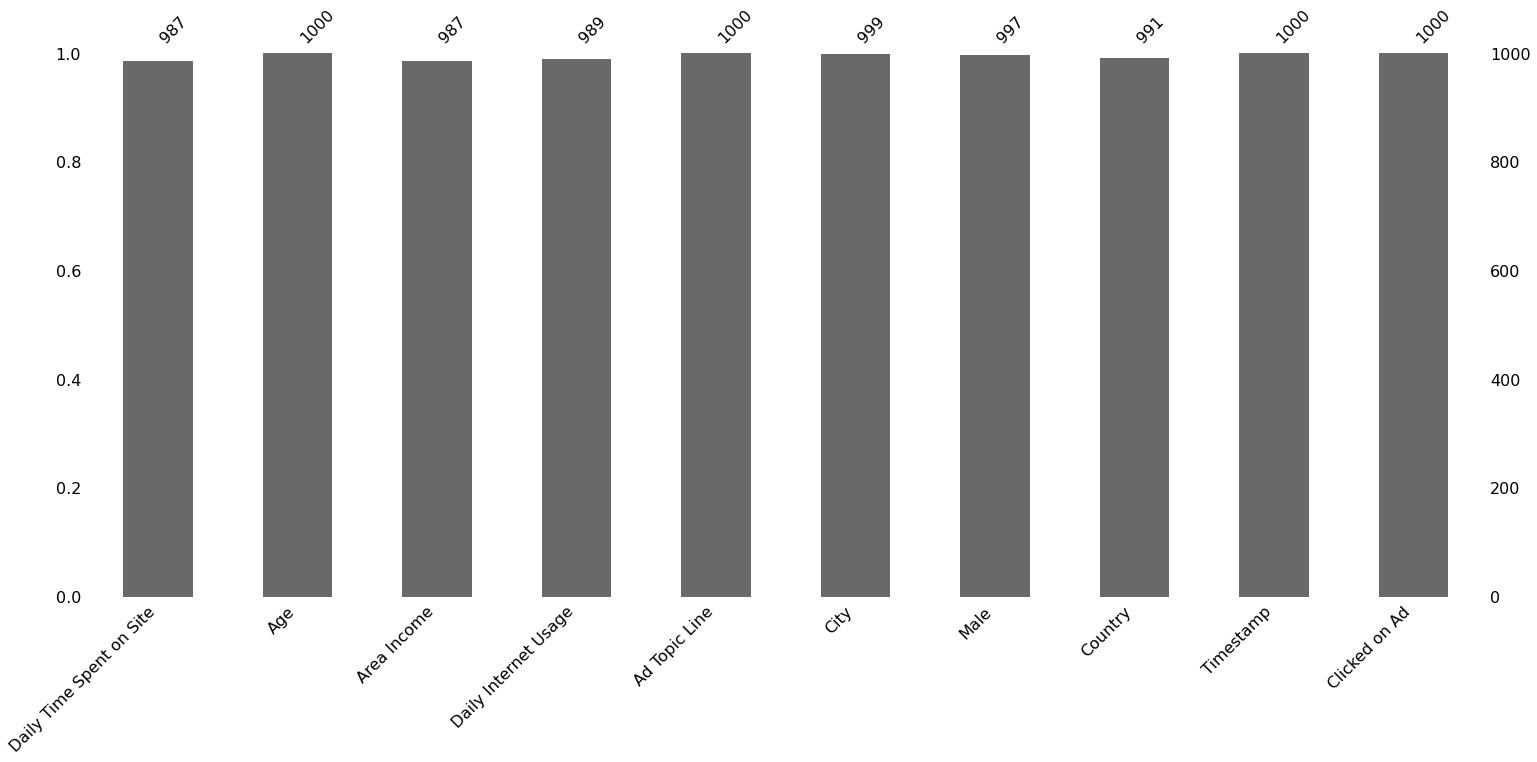

In [9]:
import missingno as msno
msno.bar(df)

In [10]:
#msno.heatmap(df)

<AxesSubplot:>

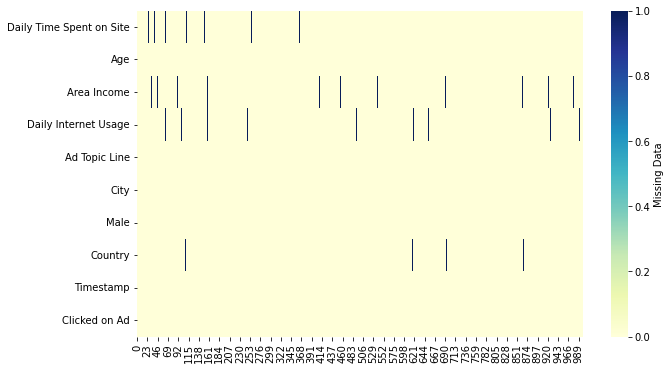

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


<Figure size 720x432 with 0 Axes>

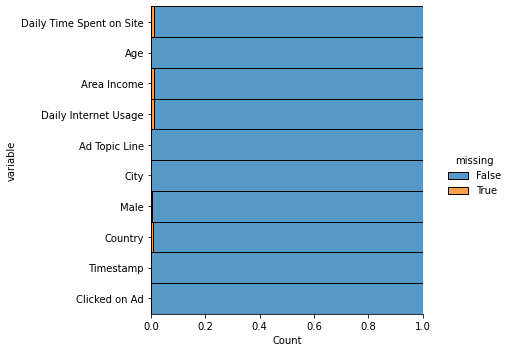

In [12]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
#plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


##### Addressing missing values
##### Ref: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [13]:
df.dropna(subset=['City', 'Male'], inplace = True)
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 12
Daily Internet Usage        11
Ad Topic Line                0
City                         0
Male                         0
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

##### The central tendency measure such as mean, median, or mode is considered for imputation. The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately. Plots such as box plots and distribution plots come very handily in deciding which techniques to use. Look for skewness of data and outliers in these plots.
##### Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the **MEAN** value for imputing missing values.
##### When the data is skewed, it is good to consider using the **MEDIAN** value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data. Also, when the data is skewed, it is good to consider using **MODE** values for replacing the missing values. Note that imputing missing data with mode values can be done with **numerical** and **categorical data**

/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Daily Time Spent on Site'>

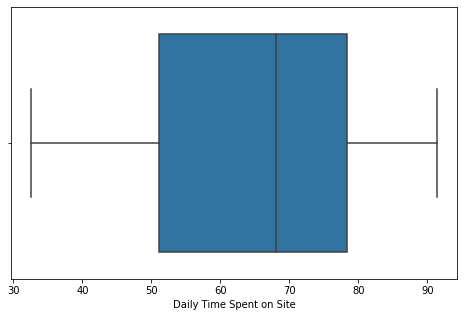

In [14]:
# For Daily Time Spent on Site
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(df['Daily Time Spent on Site'])

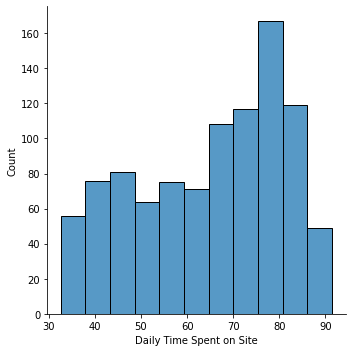

In [15]:
#fig, ax = plt.subplots(figsize = (8, 5))
sns.displot(df['Daily Time Spent on Site'])

In [16]:
# Replace missing values with mean
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df.isnull().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                 12
Daily Internet Usage        11
Ad Topic Line                0
City                         0
Male                         0
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Area Income'>

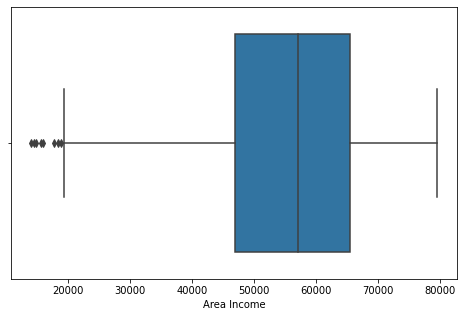

In [17]:
# For Area Income
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(df['Area Income'])

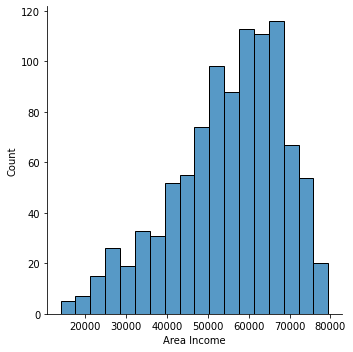

In [18]:
sns.displot(df['Area Income'])

In [19]:
# Replace missing values with mode
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].mode())
df.isnull().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                  0
Daily Internet Usage        11
Ad Topic Line                0
City                         0
Male                         0
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Daily Internet Usage'>

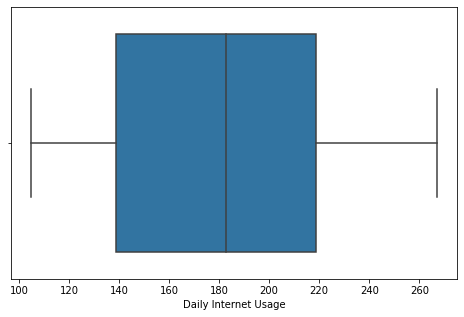

In [20]:
# For Daily Internet Usage
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(df['Daily Internet Usage'])

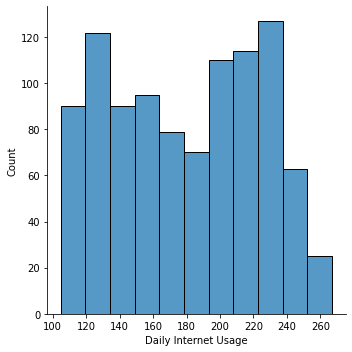

In [21]:
sns.displot(df['Daily Internet Usage'])

In [22]:
# Replace missing values with mean
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     9
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [23]:
# Parse Timestamp
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day of the month'] = df['Timestamp'].dt.day
df["Day of the week"] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df['Weekend'] = (df['Timestamp'].dt.weekday > 4) * 1 # Weekend Proximity
df = df.drop(['Timestamp'], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day of the month,Day of the week,Hour,Weekend
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,0,3,27,6,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,0,4,4,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,0,3,13,6,20,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,0,1,10,6,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,0,6,3,4,3,0


In [24]:
# Drop columns
Cols_to_drop = ['Ad Topic Line', 'City', 'Country']
df = df.drop(Cols_to_drop, axis = 1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour,Weekend
0,68.95,35,61833.90,256.09,0.0,0,3,27,6,0,1
1,80.23,31,68441.85,193.77,1.0,0,4,4,0,1,0
2,69.47,26,59785.94,236.50,0.0,0,3,13,6,20,1
3,74.15,29,54806.18,245.89,1.0,0,1,10,6,2,1
4,68.37,35,73889.99,225.58,0.0,0,6,3,4,3,0


##### VISUALIZATIONS

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

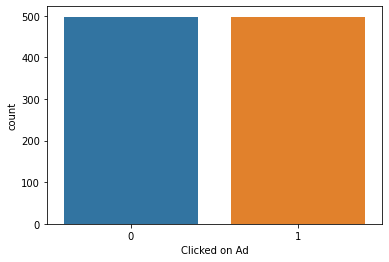

In [25]:
sns.countplot(x = 'Clicked on Ad', data = df)

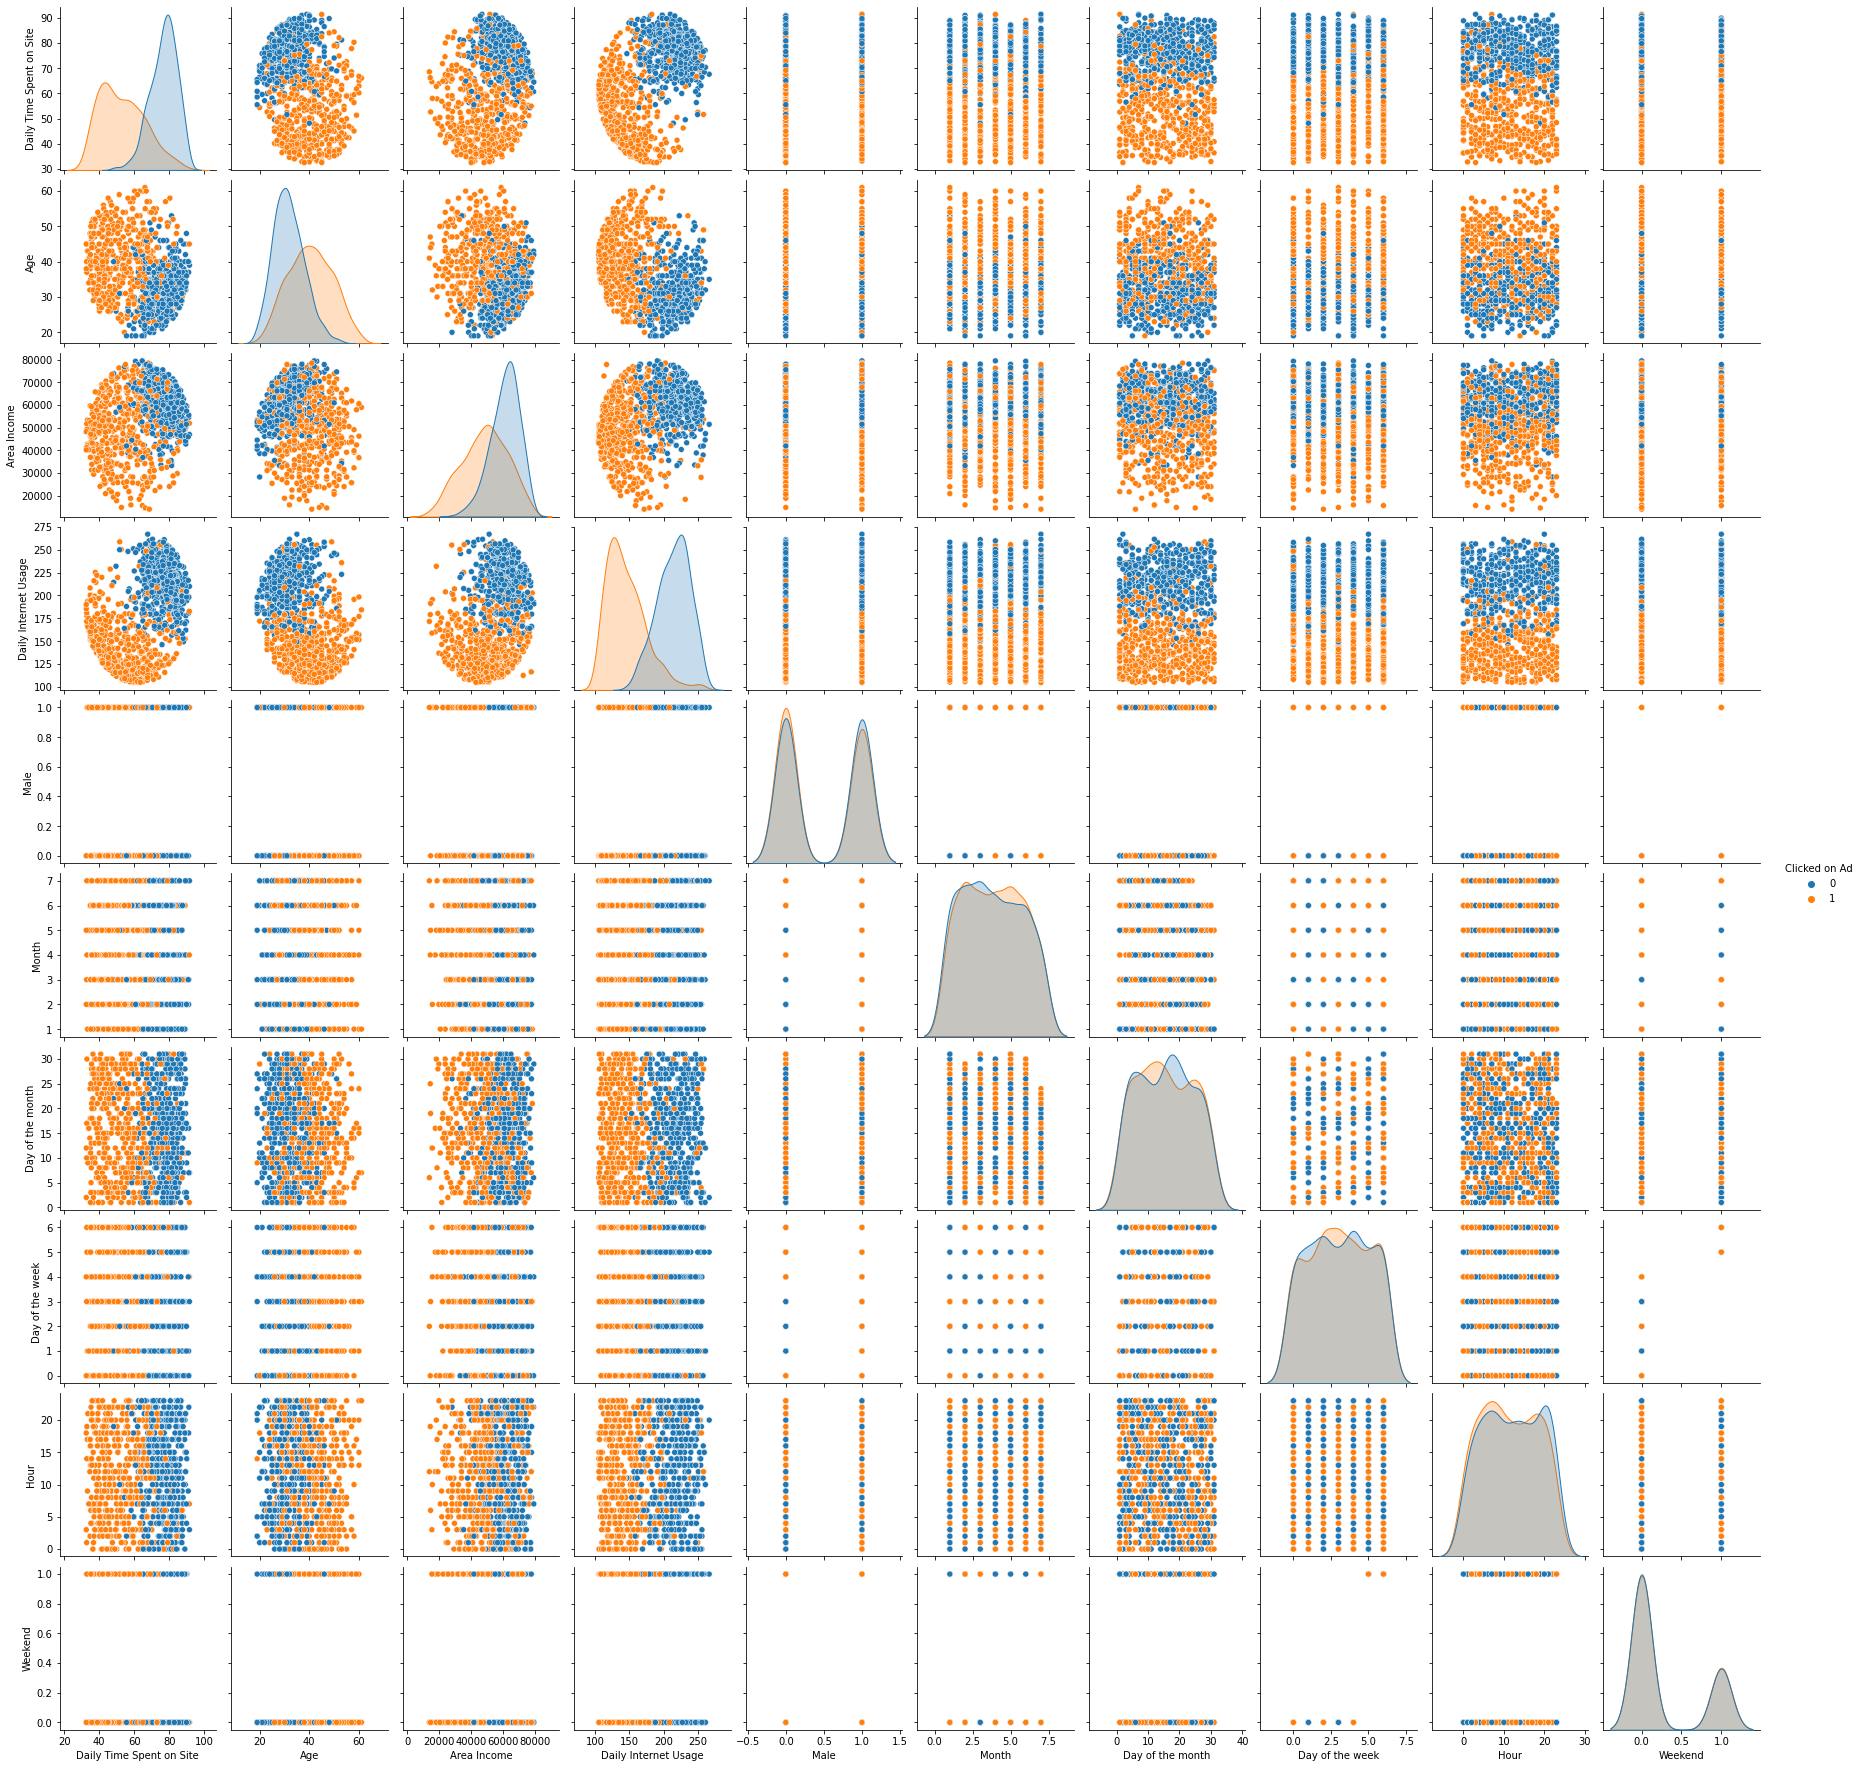

In [26]:
sns.pairplot(df, hue='Clicked on Ad')

<AxesSubplot:>

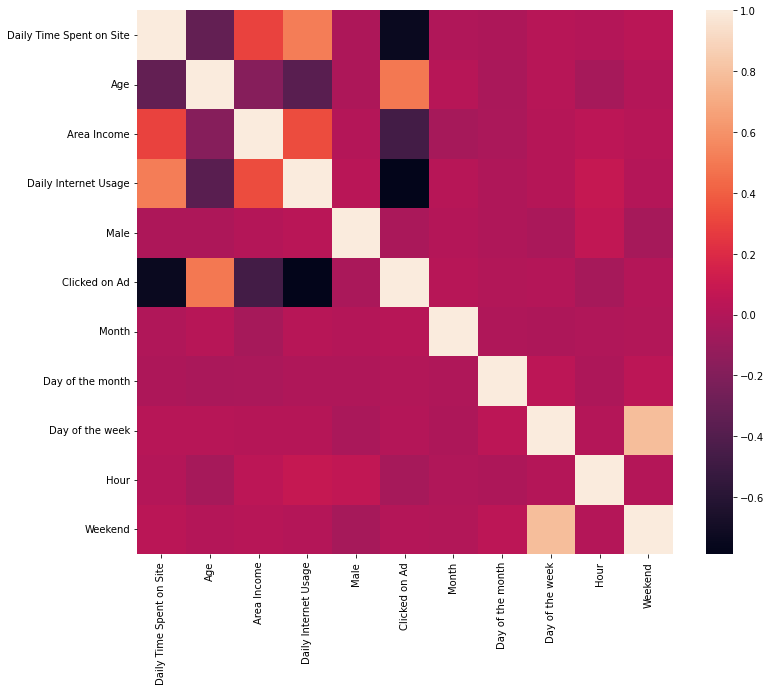

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())

In [28]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour,Weekend
Daily Time Spent on Site,1.000000,-0.330354,0.299590,0.514277,-0.020710,-0.740838,-0.009572,-0.021208,0.019908,0.002449,0.034925
Age,-0.330354,1.000000,-0.181823,-0.370310,-0.021999,0.496189,0.021779,-0.034581,0.015963,-0.047545,0.007144
Area Income,0.299590,-0.181823,1.000000,0.330551,0.004191,-0.468392,-0.047416,-0.027447,0.014316,0.042227,0.017761
Daily Internet Usage,0.514277,-0.370310,0.330551,1.000000,0.028620,-0.787026,0.020434,-0.012582,0.010717,0.082485,0.006809
Male,-0.020710,-0.021999,0.004191,0.028620,1.000000,-0.034161,0.002136,-0.014102,-0.039038,0.060468,-0.051552
Clicked on Ad,-0.740838,0.496189,-0.468392,-0.787026,-0.034161,1.000000,0.019284,-0.004600,0.002008,-0.049343,0.004448
Month,-0.009572,0.021779,-0.047416,0.020434,0.002136,0.019284,1.000000,-0.017419,-0.020351,-0.011525,-0.005067
Day of the month,-0.021208,-0.034581,-0.027447,-0.012582,-0.014102,-0.004600,-0.017419,1.000000,0.039354,-0.019549,0.037039
Day of the week,0.019908,0.015963,0.014316,0.010717,-0.039038,0.002008,-0.020351,0.039354,1.000000,0.006192,0.789300
Hour,0.002449,-0.047545,0.042227,0.082485,0.060468,-0.049343,-0.011525,-0.019549,0.006192,1.000000,0.006282


##### Checking for multicollinearity
##### Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
##### VIF - variance inflation factor is used to determine t he strenght of the correlation between the various independent variables.
##### VIF = 1, means features are not correlated, 1 <VIF<5 , features are moderately correlated, VIF > 5, features are highly correlated, VIF > 10, cause for concern

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [30]:
calculate_vif(df=df, features=['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week', 'Hour', 'Weekend'])


,VIF,Tolerance
Age,1.203389,0.830986
Daily Time Spent on Site,1.445236,0.691928
Area Income,1.158840,0.862932
Daily Internet Usage,1.524114,0.656119
Male,1.008820,0.991257
Month,1.005853,0.994181
Day of the month,1.005851,0.994183
Day of the week,2.657422,0.376305
Hour,1.014167,0.986031
Weekend,2.660648,0.375848


##### Another method for calculating VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_variables = df[['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week', 'Hour', 'Weekend']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
0,Age,10.593580
1,Daily Time Spent on Site,23.074295
2,Area Income,18.497200
3,Daily Internet Usage,24.707350
4,Male,1.920631
5,Month,4.731035
6,Day of the month,3.920018
7,Day of the week,8.632061
8,Hour,3.751688
9,Weekend,3.676949


##### Modeling & Prediction

In [32]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [33]:
# Take out a test set
train, test = train_test_split(df, test_size = 0.3, stratify = df['Clicked on Ad'], random_state = 42)

In [36]:
# number of instances in each class in training data
train.groupby('Clicked on Ad').size()

Clicked on Ad
0    348
1    349
dtype: int64

In [37]:
# separate out the class label and features first
X_train = train[['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week', 'Hour', 'Weekend']]
y_train = train['Clicked on Ad']
X_test = test[['Age','Daily Time Spent on Site','Area Income','Daily Internet Usage', 'Male', 'Month', 'Day of the month', 'Day of the week', 'Hour', 'Weekend']]
y_test = test['Clicked on Ad']

##### Logistic Regression

In [39]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [40]:
Predict_LogReg = LogReg.predict(X_test)
predictions_train = LogReg.predict(X_train)
print ('Accuracy Score:', metrics.accuracy_score(y_test, Predict_LogReg))
print('')
print('Log Loss:', metrics.log_loss(y_test, Predict_LogReg))
print('')
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, Predict_LogReg))
print('')
print('Classification report:\n\n',metrics.classification_report(y_test, Predict_LogReg))

Accuracy Score: 0.9331103678929766

Log Loss: 2.3102994176768052

Confusion Matrix:
 [[145   5]
 [ 15 134]]

Classification report:

               precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



In [84]:
# provide a new set of values for prediction
new_input = [[67.77, 32, 71000.12, 195.22, 0.0, 2, 26, 3, 1, 0]]

In [86]:
new_output = LogReg.predict(new_input)
print(new_input, new_output)

[[67.77, 32, 71000.12, 195.22, 0.0, 2, 26, 3, 1, 0]] [1]


/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [82]:
# Save predictions to csv
Model_csv = pd.DataFrame(Predict_LogReg)
Model_csv.index = X_test.index
Model_csv.columns = ['Predictions']
Model_csv.to_csv('Predictions.csv')

##### Classification Tree
##### The first classifier that comes up to my mind is a discriminative classification model called classification trees. The reason is that we get to see the classification rules and it is easy to interpret. Let’s build one using sklearn, with a maximum depth of 3, and we can check its accuracy on the test data:

In [47]:
Model_Dtree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
Model_Dtree.fit(X_train, y_train)
Dtree_Predict = Model_Dtree.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(Dtree_Predict, y_test)))


The accuracy of the Decision Tree is 0.950


In [42]:
# Importance of each predictor
Model_Dtree.feature_importances_

array([0.        , 0.20657723, 0.03843344, 0.75498932, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [52]:
from sklearn import tree
text_representation = tree.export_text(Model_Dtree)
print(text_representation)

|--- feature_3 <= 179.45
|   |--- feature_1 <= 70.17
|   |   |--- feature_2 <= 76939.03
|   |   |   |--- class: 1
|   |   |--- feature_2 >  76939.03
|   |   |   |--- class: 0
|   |--- feature_1 >  70.17
|   |   |--- feature_3 <= 163.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  163.00
|   |   |   |--- class: 0
|--- feature_3 >  179.45
|   |--- feature_1 <= 48.16
|   |   |--- class: 1
|   |--- feature_1 >  48.16
|   |   |--- feature_2 <= 31483.49
|   |   |   |--- class: 1
|   |   |--- feature_2 >  31483.49
|   |   |   |--- class: 0



In [62]:
# Visualize tree
#plt.figure(figsize = (10,8))
#plot_tree(Model_Dtree, feature_names = fn, class_names = cn, filled = True);

[Text(0.5416666666666666, 0.875, 'X[3] <= 179.448\ngini = 0.5\nsamples = 697\nvalue = [348, 349]'),
 Text(0.3333333333333333, 0.625, 'X[1] <= 70.17\ngini = 0.156\nsamples = 329\nvalue = [28, 301]'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 76939.027\ngini = 0.029\nsamples = 272\nvalue = [4, 268]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.015\nsamples = 269\nvalue = [2, 267]'),
 Text(0.25, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.375, 'X[3] <= 163.0\ngini = 0.488\nsamples = 57\nvalue = [24, 33]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.165\nsamples = 33\nvalue = [3, 30]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.75, 0.625, 'X[1] <= 48.155\ngini = 0.227\nsamples = 368\nvalue = [320, 48]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 31483.494\ngini = 0.106\nsamples = 339\nvalue = [320, 19]'),
 Text(0.75, 0.125, 'gini = 0.245\nsam

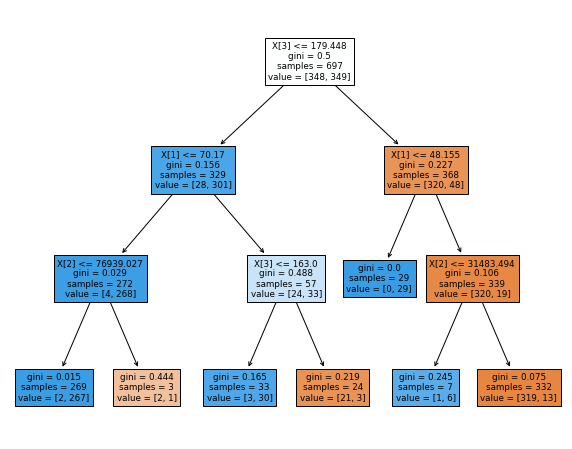

In [56]:
plt.figure(figsize = (10,8))
tree.plot_tree(Model_Dtree, filled=True)

/Users/fayicksuleman/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


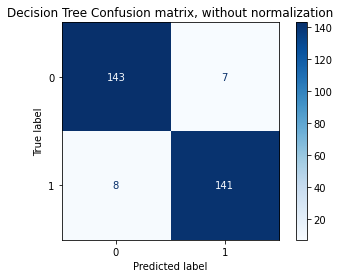

In [64]:
disp = metrics.plot_confusion_matrix(Model_Dtree, X_test, y_test,
                                 #display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');


#### Gaussian Naive Bayes Classifier
##### One of the most popular classification models is Naive Bayes. It contains the word “Naive” because it has a key assumption of class-conditional independence, which means that given the class, each feature’s value is assumed to be independent of that of any other feature. We know that it is clearly not the case here, evidenced by the high correlation between the petal features. Let’s examine the test accuracy using this model to see whether this assumption is robust:

In [65]:
Model_GNB = GaussianNB()
y_pred = Model_GNB.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.970


##### Linear Discriminant Analysis (LDA)
##### If we use multivariate Gaussian distribution to calculate the class conditional density instead of taking a product of univariate Gaussian distribution (used in Naive Bayes), we would then get a LDA model. The key assumption of LDA is that the covariances are equal among classes. We can examine the test accuracy using all features and only petal features:

In [66]:
# LDA Classifier
Model_LDA = LinearDiscriminantAnalysis()
y_Pred = Model_LDA.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_Pred,y_test)))

The accuracy of the LDA Classifier on test data is 0.970


##### Quadratic Discriminant Analysis (QDA)
##### The difference between LDA and QDA is that QDA does NOT assume the covariances to be equal across classes, and it is called “quadratic” because the decision boundary is a quadratic function. It has the same accuracy with LDA in the case of all features, and it performs slightly better when only using petals.

In [67]:
# QDA Classifier
Model_QDA = QuadraticDiscriminantAnalysis()
Y_Pred = Model_QDA.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(Y_Pred,y_test)))

The accuracy of the QDA Classifier is 0.970


##### K Nearest Neighbors (K-NN)
##### Now, let’s switch gears a little and take a look at a non-parametric generative model called KNN (read more here). It is a popular model since it is relatively simple and easy to implement. However, we need to be aware of the curse of dimensionality when number of features gets large.


In [73]:
# KNN, first try 5
Model_Knn = KNeighborsClassifier(n_neighbors = 5) 
Model_Knn.fit(X_train,y_train)
prediction = Model_Knn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction, y_test)))

The accuracy of the 5NN Classifier is 0.702


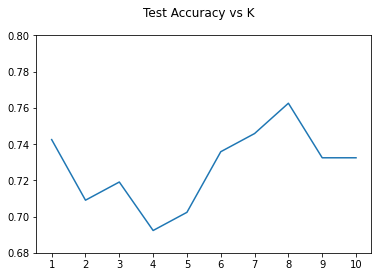

In [77]:
# try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
    mod_knn = KNeighborsClassifier(n_neighbors=i) 
    mod_knn.fit(X_train, y_train)
    prediction = mod_knn.predict(X_test)
    acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
    
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.68,0.8);

##### SVC

In [78]:
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
linear_svc = SVC(kernel='linear').fit(X_train, y_train)
prediction=linear_svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))


The accuracy of the linear SVC is 0.977


In [79]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='poly', degree = 4).fit(X_train, y_train)
prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Poly SVC is 0.722
